# Build a spaCy Processing Pipeline



#Exercise #1:  Load Resources

In [1]:
#EXERCISE - Load spaCy Resources


#import pandas as pd
import pandas as pd

#Install spaCy
!pip install spacy

#Import spaCy
import spacy

#Download the English language model for spaCy
!python -m spacy download en_core_web_sm

#Load the English model
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


When you execute nlp = spacy.load('en'), spaCy downloads and loads the pre-trained English language model into memory and assigns it to the variable nlp. This pre-trained model contains information about word vectors, part-of-speech tags, syntactic dependencies, and other linguistic features necessary for various NLP tasks.

##spaCy Procesing Pipeline

In spaCy, the order of tasks in the processing pipeline generally follows a predefined sequence, although it's also customizable. By default, spaCy's processing pipeline includes the following components in the specified order:



### Order of Tasks in the Processing Pipeline

| Order | Name         | Definition |
| :-----| :------ |: ---- |
| 1     | Tokenization | Input text is split into individual tokens, such as words and punctuation marks. |
| 2     | Stop Words    | Removes stop words from the text. |
| 3     | POS Tagging   | Assigns grammatical labels (e.g., noun, verb, adjective) to each token in the text based on its syntactic role within the sentence. |
| 4     | Dependency Parsing| Analyzes the grammatical structure of the text by determining the relationships |
| 5     |Lemmatization | Reduces tokens to their base or root form (lemmas)  |
| 6     |  Named Entity Recognition|  Identifies, categorizes persons, organizations, locations, dates, etc.|
| 7     | Other Use Case Tasks| May be included in pipelne (Sentiment Analysis) |


# Exercise #2:  Build a Simple Processing Pipeline

In [2]:
#EXERCISE - Build a Simple Processing Pipeline

# Keep this
text = "A customer in New York City wants give a review."
doc = nlp(text)


In [3]:
#Processing Pipeline Order

#Tokenization
for token in doc:
    print(token.text)

A
customer
in
New
York
City
wants
give
a
review
.


In [4]:
#Stop Words Removal
filtered_tokens = [token.text for token in doc if not token.is_stop]
print(filtered_tokens)

['customer', 'New', 'York', 'City', 'wants', 'review', '.']


In [5]:
#POS Tagging
for token in doc:
    print(token.text, token.pos_)

A DET
customer NOUN
in ADP
New PROPN
York PROPN
City PROPN
wants VERB
give VERB
a DET
review NOUN
. PUNCT


In [7]:
#Lemmatization

lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct]
print(lemmatized_tokens)

['a', 'customer', 'in', 'New', 'York', 'City', 'want', 'give', 'a', 'review']


In [8]:
#Named Entity Recognition
for ent in doc.ents:
    print(ent.text, ent.label_)


New York City GPE


#Exercise #3: Build a Processing Pipeline with a File

In [10]:
# Run this cell

file_path = 'sentiment_examples.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    sentiment_texts = file.readlines()

In [12]:
# EXERCISE - SCROLL DOWN TO THE "START HERE" SECTION BELOW.

# Initialize empty lists to store the results
token_lists = []
filtered_token_lists = []
pos_tag_lists = []
ner_lists = []

#-----------------------------------------------------------------------------
# START HERE

# Process each sentiment example using spaCy and store the results
for sentiment_text in sentiment_texts:
    doc = nlp(sentiment_text.strip())  # Strip any leading/trailing whitespace

    # Tokenization
    tokens = [token.text for token in doc]
    token_lists.append(tokens)

    # Stop Word Removal filter
    filtered_tokens = [token.text for token in doc if not token.is_stop]
    filtered_token_lists.append(filtered_tokens)

    # Part-of-Speech Tagging (POS tagging)
    pos_tags = [(token.text, token.pos_) for token in doc]
    pos_tag_lists.append(pos_tags)

    # Named Entity Recognition (NER)
    ner_entities = [(ent.text, ent.label_) for ent in doc.ents]
    ner_lists.append(ner_entities)

#-----------------------------------------------------------------------------
# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Sentiment Example': sentiment_texts,
    'Tokens': token_lists,
    'Filtered Tokens': filtered_token_lists,
    'POS Tags': pos_tag_lists,
    'Named Entities': ner_lists
})

# Display the DataFrame
print(results_df)


                                   Sentiment Example  \
0  "I love the new features of your product! It h...   
1  "The customer support was exceptional in New Y...   
2  "The quality of your service exceeded my expec...   
3  "I'm extremely satisfied with my purchase. The...   
4  "The user interface is intuitive and easy to n...   
5  "I had a positive experience shopping on your ...   
6  "Your company values customer feedback, and it...   
7  "The pricing is fair, and the value I get in r...   
8  "I appreciate the personalized recommendations...   
9  "The delivery was prompt, and the packaging wa...   

                                              Tokens  \
0  [", I, love, the, new, features, of, your, pro...   
1  [", The, customer, support, was, exceptional, ...   
2  [", The, quality, of, your, service, exceeded,...   
3  [", I, 'm, extremely, satisfied, with, my, pur...   
4  [", The, user, interface, is, intuitive, and, ...   
5  [", I, had, a, positive, experience, shoppin

#Exercise #4 (Optional): Exploratory Data Analysis

Perform Data Analysis: You can perform various data analysis tasks on the processed data. For example, you can calculate statistics, count occurrences, or visualize the data using plots and charts.

Export Data to CSV or Excel: If you want to save the processed data for future use or analysis in other tools, you can export the DataFrame to a CSV or Excel file.

In [14]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [15]:
results_df.to_csv('processed_data.csv', index=False)
results_df.to_excel('processed_data.xlsx', index=False)


In [17]:
processed_df = pd.read_csv('processed_data.csv', encoding='latin-1')

In [18]:
processed_df.head()

,Sentiment Example,Tokens,Filtered Tokens,POS Tags,Named Entities
0,"""I love the new features of your product! It h...","['""', 'I', 'love', 'the', 'new', 'features', '...","['""', 'love', 'new', 'features', 'product', '!...","[('""', 'PUNCT'), ('I', 'PRON'), ('love', 'VERB...",[]
1,"""The customer support was exceptional in New Y...","['""', 'The', 'customer', 'support', 'was', 'ex...","['""', 'customer', 'support', 'exceptional', 'N...","[('""', 'PUNCT'), ('The', 'DET'), ('customer', ...","[('New York', 'GPE')]"
2,"""The quality of your service exceeded my expec...","['""', 'The', 'quality', 'of', 'your', 'service...","['""', 'quality', 'service', 'exceeded', 'expec...","[('""', 'PUNCT'), ('The', 'DET'), ('quality', '...","[('Prague', 'GPE')]"
3,"""I'm extremely satisfied with my purchase. The...","['""', 'I', ""'m"", 'extremely', 'satisfied', 'wi...","['""', 'extremely', 'satisfied', 'purchase', '....","[('""', 'PUNCT'), ('I', 'PRON'), (""'m"", 'AUX'),...",[]
4,"""The user interface is intuitive and easy to n...","['""', 'The', 'user', 'interface', 'is', 'intui...","['""', 'user', 'interface', 'intuitive', 'easy'...","[('""', 'PUNCT'), ('The', 'DET'), ('user', 'NOU...",[]


Calculate the count of tokens for each sentiment.

In [20]:
%pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 31.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


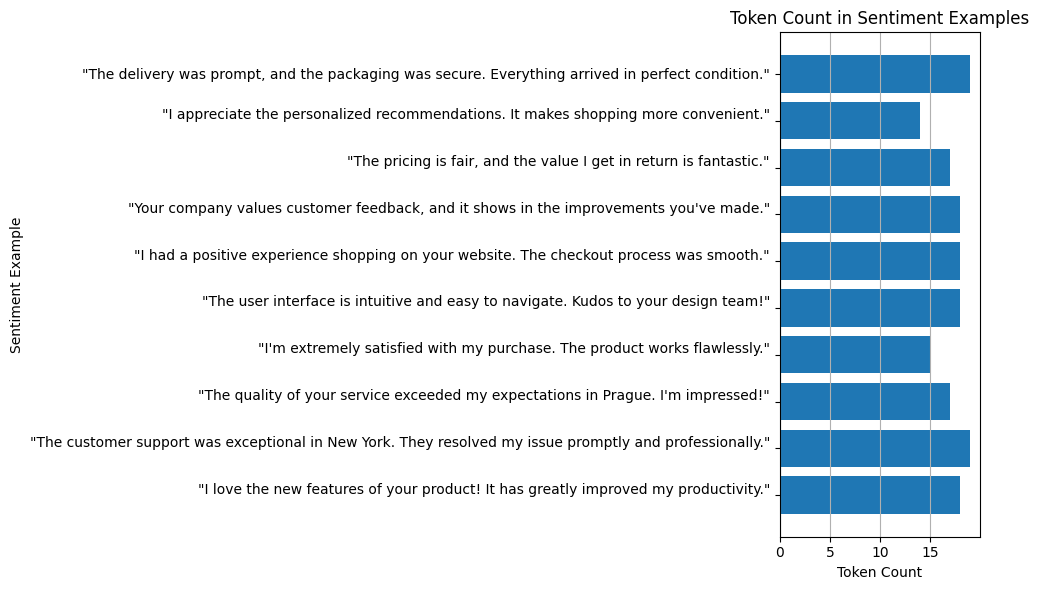

In [22]:
import matplotlib.pyplot as plt

# Load the processed data from the CSV file
file_path = 'processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate the count of tokens for each sentiment example
token_counts = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(processed_data['Sentiment Example'], token_counts)  # Horizontal bar chart
plt.xlabel('Token Count')  # X-axis label
plt.ylabel('Sentiment Example')  # Y-axis label
plt.title('Token Count in Sentiment Examples')  # Chart title
plt.grid(axis='x')  # Show grid lines on the x-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Histogram of Token Lengths: Visualize the distribution of token lengths in the sentiment examples. This can give insights into the length of words used in the text.

/tmp/ipykernel_1960/1604240985.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


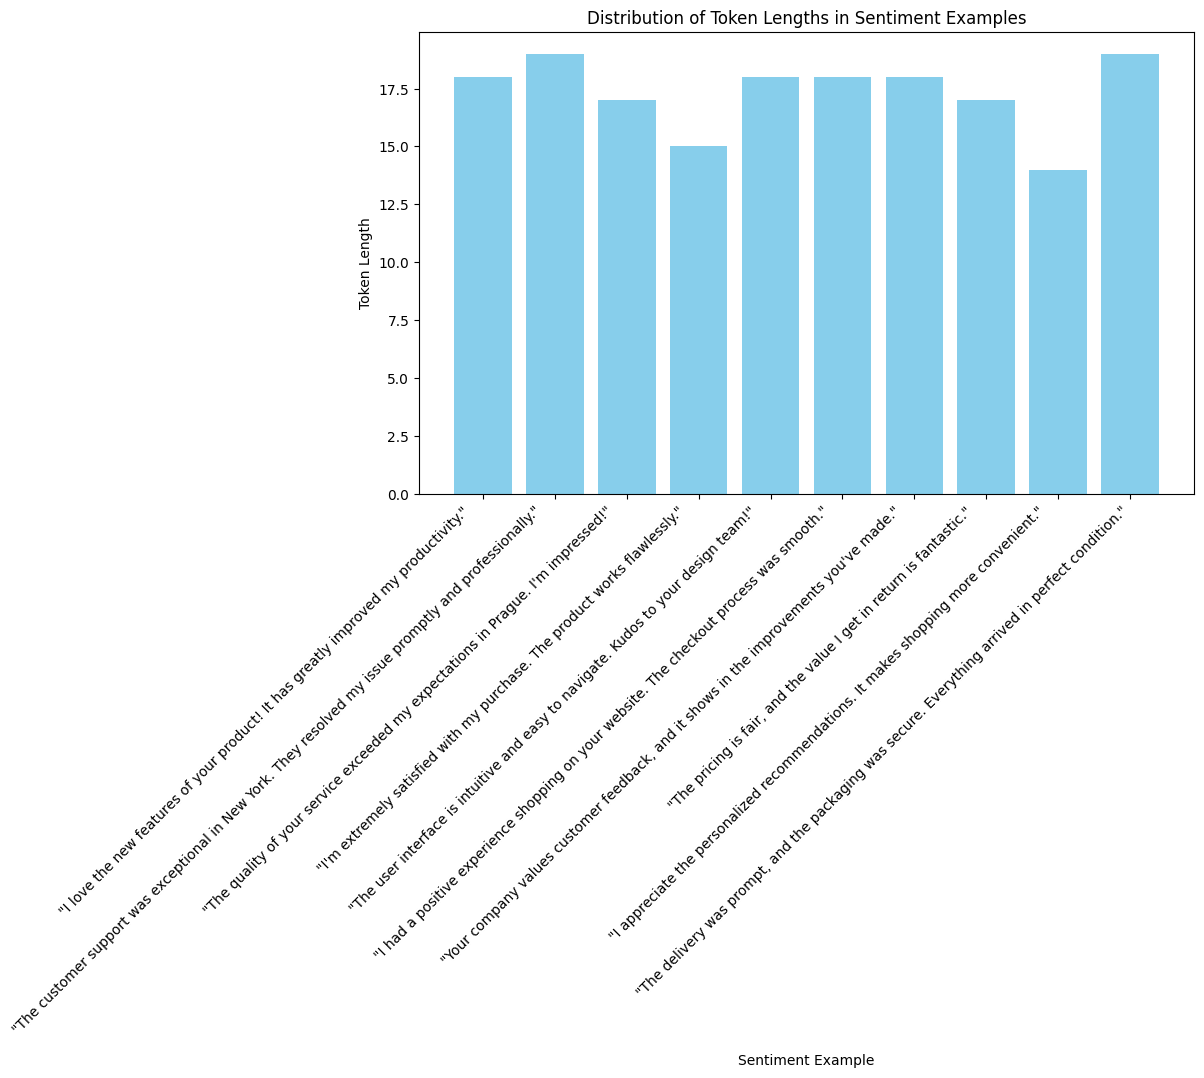

In [23]:
# Load the processed data from the CSV file
file_path = 'processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate token lengths for each sentiment example
processed_data['Token Length'] = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart to visualize token lengths
plt.figure(figsize=(10, 6))
plt.bar(processed_data['Sentiment Example'], processed_data['Token Length'], color='skyblue')
plt.xlabel('Sentiment Example')
plt.ylabel('Token Length')
plt.title('Distribution of Token Lengths in Sentiment Examples')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()




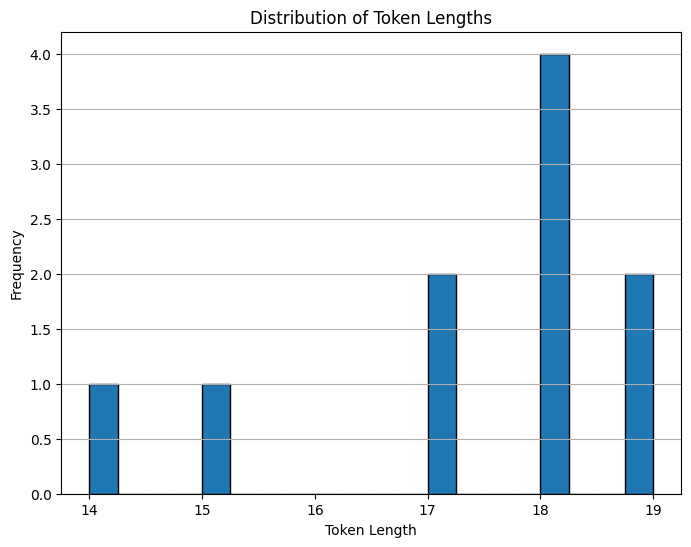

In [24]:
# Calculate token lengths
token_lengths = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(token_lengths, bins=20, edgecolor='black')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.grid(axis='y')
plt.show()


Word Cloud of Tokens: Create a word cloud to visualize the most common words in the sentiment examples. This can highlight frequently used words and themes.

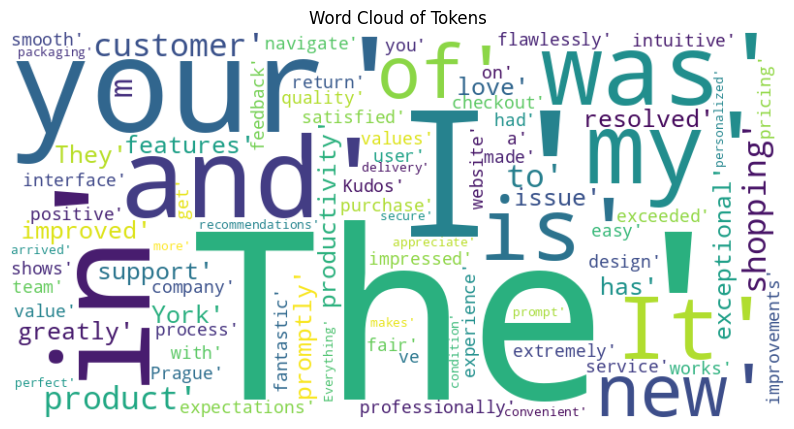

In [25]:
from wordcloud import WordCloud

# Combine all tokens into a single text
all_tokens = ' '.join(processed_data['Tokens'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Tokens')
plt.show()
